In [3]:
%load_ext autoreload
%autoreload 2

import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import pymudokon as pm

plt.style.use("dark_background")
# jax.config.update("jax_enable_x64", True)
jax.config.update('jax_platform_name', 'cpu')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
total_time = 25.0
timestep = 0.01
strain_target = 0.005
num_steps = int(total_time/timestep)

num_particles =1

strain_target_list = -jnp.linspace(0,strain_target,num_steps)

eps_path = jnp.vstack([strain_target_list for _ in range(num_particles)])

In [46]:

stress_ref = jnp.tile(-100000.0*jnp.eye(3), (num_particles, 1, 1))

material = pm.ModifiedCamClay.register(
    E = 5e4,
    nu = 0.3,
    M = 1.2,
    lam = 0.62,
    kap = 0.055,
    Vs = 0.8,
    R = 1,
    stress_ref= stress_ref,
    num_particles =num_particles
)

volumes = jnp.ones(num_particles)

In [47]:
store, material = pm.simple_shear(material,eps_path,volumes,timestep,results_to_store= ["eps_e"] )


/home/retief/Projects/PymudokonMPM/pymudokon/materials/modifiedcamclay.py:189: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  sol = jnp.array([0.0, eps_v_p_prev],dtype=jnp.float64)
/home/retief/Projects/PymudokonMPM/pymudokon/materials/modifiedcamclay.py:191: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  R = jnp.array([1.0, 1.0],dtype=jnp.float64)
/home/retief/Projects/PymudokonMPM/pymudokon/materials/modifiedcamclay.py:172: UserWarning: Exp

(2, 2)
Step 0 of 2500
Step 1 of 2500
Step 2 of 2500
Step 3 of 2500
Step 4 of 2500
Step 5 of 2500
Step 6 of 2500
Step 7 of 2500
Step 8 of 2500
Step 9 of 2500
Step 10 of 2500
Step 11 of 2500
Step 12 of 2500
Step 13 of 2500
Step 14 of 2500
Step 15 of 2500
Step 16 of 2500
Step 17 of 2500
Step 18 of 2500
Step 19 of 2500
Step 20 of 2500
Step 21 of 2500
Step 22 of 2500
Step 23 of 2500
Step 24 of 2500
Step 25 of 2500
Step 26 of 2500
Step 27 of 2500
Step 28 of 2500
Step 29 of 2500
Step 30 of 2500
Step 31 of 2500
Step 32 of 2500
Step 33 of 2500
Step 34 of 2500
Step 35 of 2500
Step 36 of 2500
Step 37 of 2500
Step 38 of 2500
Step 39 of 2500
Step 40 of 2500
Step 41 of 2500
Step 42 of 2500
Step 43 of 2500
Step 44 of 2500
Step 45 of 2500
Step 46 of 2500
Step 47 of 2500
Step 48 of 2500
Step 49 of 2500
Step 50 of 2500
Step 51 of 2500
Step 52 of 2500
Step 53 of 2500
Step 54 of 2500
Step 55 of 2500
Step 56 of 2500
Step 57 of 2500
Step 58 of 2500
Step 59 of 2500
Step 60 of 2500
Step 61 of 2500
Step 62 of 

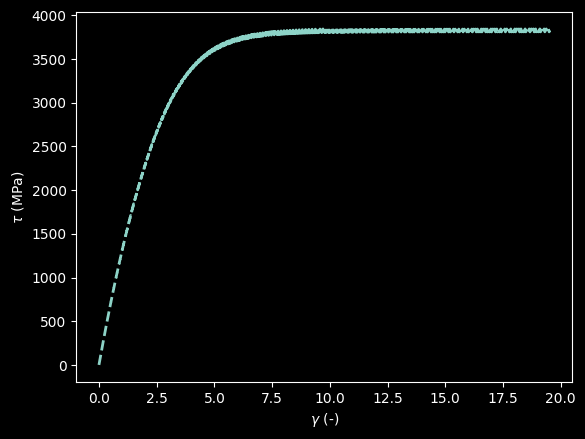

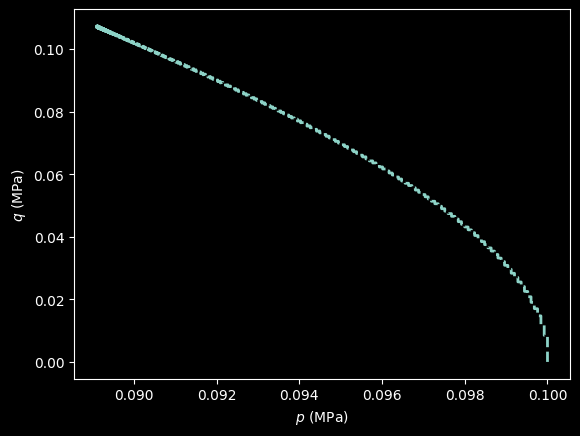

In [44]:
stress_list = store["stress"][:,0,:].to_numpy()
strain_list = store["eps_path"][:,0,:].to_numpy()

# print(stress_list)
fig_tg, ax_tg = plt.subplots()
fig_pq, ax_pq = plt.subplots()

pm.plot_tau_gamma(
    stress_list,
    strain_list,
    fig_ax = (fig_tg,ax_tg),
    plot_options={"linewidth":2.0,"ls":"--"}
)

pm.plot_q_p(
    stress_list,
    fig_ax = (fig_pq,ax_pq),
    plot_options={"linewidth":2.0,"ls":"--"}
    )

In [ ]:
# material = pm.LinearIsotropicElastic.register(1000,0.3,2,3)

In [ ]:


# store, material = pm.simple_shear(material,eps_path,0.01,results_to_store= ["eps_e"] )


In [ ]:
# stress_list = store["stress"][:,0,:].to_numpy()
# strain_list = store["eps_path"][:,0,:].to_numpy()

# print(stress_list)
# fig_tg, ax_tg = plt.subplots()
# fig_pq, ax_pq = plt.subplots()

# pm.plot_tau_gamma(
#     stress_list,
#     strain_list,
#     fig_ax = (fig_tg,ax_tg),
#     plot_options={"linewidth":2.0,"ls":"--"}
# )

# pm.plot_q_p(
#     stress_list,
#     fig_ax = (fig_pq,ax_pq),
#     plot_options={"linewidth":2.0,"ls":"--"}
#     )

In [ ]:
stress_list = store["stress"][:,0,:].to_numpy()
strain_list = store["eps_path"][:,0,:].to_numpy()

print(stress_list)
fig_tg, ax_tg = plt.subplots()
fig_pq, ax_pq = plt.subplots()

pm.plot_tau_gamma(
    stress_list,
    strain_list,
    fig_ax = (fig_tg,ax_tg),
    plot_options={"linewidth":2.0,"ls":"--"}
)

pm.plot_q_p(
    stress_list,
    fig_ax = (fig_pq,ax_pq),
    plot_options={"linewidth":2.0,"ls":"--"}
    )